In [10]:
# Milestone 4 – Web Interface & Admin Panel


import sqlite3
conn = sqlite3.connect("study_logs.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS study_logs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_name TEXT,
    subject TEXT,
    duration INTEGER,
    date TEXT
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS admin (
    username TEXT PRIMARY KEY,
    password TEXT
)
""")

cursor.execute("INSERT OR IGNORE INTO admin VALUES (?, ?)", ("admin", "admin123"))
conn.commit()

print("Database Ready!")


Database Ready!


In [26]:
## Section 1: Student Interface

import datetime

def student_interface():
    print("📘 Student Study Log Interface\n")

    name = input("Enter your name: ")
    subject = input("Enter subject studied: ")
    duration = int(input("Enter study duration in minutes: "))
    date = input("Enter date (YYYY-MM-DD) or press Enter for today: ")

    if date.strip() == "":
        date = str(datetime.date.today())

    cursor.execute("""
    INSERT INTO study_logs (student_name, subject, duration, date)
    VALUES (?, ?, ?, ?)
    """, (name, subject, duration, date))

    conn.commit()
    print("\nStudy log saved successfully! 📚")

student_interface()


📘 Student Study Log Interface

Enter your name: Sam
Enter subject studied: Java
Enter study duration in minutes: 40
Enter date (YYYY-MM-DD) or press Enter for today: 

Study log saved successfully! 📚


In [27]:
## Section 2: Admin Panel

def admin_login():
    print("🔐 Admin Login")
    username = input("Enter username: ")
    password = input("Enter password: ")

    cursor.execute("SELECT * FROM admin WHERE username=? AND password=?", (username, password))
    result = cursor.fetchone()

    if result:
        print("Login successful! ✔")
        admin_panel()
    else:
        print("Invalid login ❌")

def admin_panel():
    while True:
        print("""
Admin Panel Options:
1. View all study logs
2. Add a new log
3. Update a log
4. Delete a log
5. Exit Admin Panel
""")

        choice = input("Enter choice: ")

        if choice == "1":
            cursor.execute("SELECT * FROM study_logs")
            rows = cursor.fetchall()
            for r in rows:
                print(r)

        elif choice == "2":

            name = input("Student Name: ")
            subject = input("Subject: ")
            duration = int(input("Duration: "))
            date = input("Date (YYYY-MM-DD): ")

            cursor.execute("INSERT INTO study_logs (student_name, subject, duration, date) VALUES (?, ?, ?, ?)",
                           (name, subject, duration, date))
            conn.commit()
            print("Log added!")

        elif choice == "3":
            log_id = int(input("Enter ID to update: "))
            new_duration = int(input("New duration: "))

            cursor.execute("UPDATE study_logs SET duration=? WHERE id=?", (new_duration, log_id))
            conn.commit()
            print("Updated successfully!")

        elif choice == "4":
            log_id = int(input("Enter ID to delete: "))
            cursor.execute("DELETE FROM study_logs WHERE id=?", (log_id,))
            conn.commit()
            print("Deleted successfully!")

        elif choice == "5":
            print("Exiting admin panel…")
            break

        else:
            print("Invalid choice")

admin_login()


🔐 Admin Login
Enter username: admin
Enter password: admin123
Login successful! ✔

Admin Panel Options:
1. View all study logs
2. Add a new log
3. Update a log
4. Delete a log
5. Exit Admin Panel

Enter choice: 1
(1, 'Akash', 'Math', 45, '2025-11-23')
(2, 'Paul', 'Python', 30, '2025-11-25')
(3, 'Thomas', 'English', 25, '2025-11-25')
(5, 'Raj', 'Math', 10, '2025-11-25')
(6, 'Praveen', 'Math', 20, '2025-11-25')
(7, 'Kumar', 'English', 30, '2025-11-25')
(8, 'Sam', 'Java', 40, '2025-11-25')

Admin Panel Options:
1. View all study logs
2. Add a new log
3. Update a log
4. Delete a log
5. Exit Admin Panel

Enter choice: 5
Exiting admin panel…


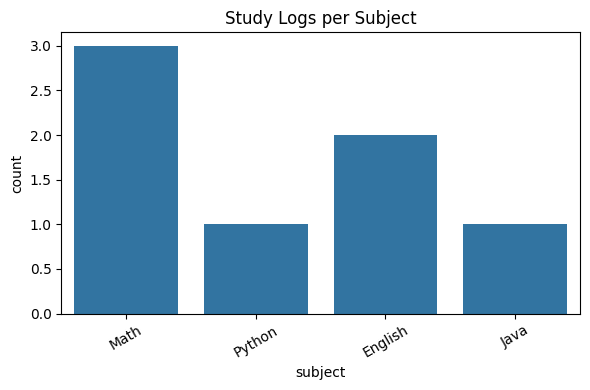

In [28]:
## Section 3: Testing & Observations

import os
os.makedirs("visualizations", exist_ok=True)


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_sql_query("SELECT * FROM study_logs", conn)

plt.figure(figsize=(6,4))
sns.countplot(x="subject", data=df)
plt.title("Study Logs per Subject")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("visualizations/recommendation_countplot.png")
plt.show()
